In [12]:
import pandas as pd
import numpy as np
import seaborn as sn
%matplotlib inline

In [13]:
autos = pd.read_csv( "../data/Auto.csv")

In [14]:
autos.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [15]:
autos["horsepower"] = autos["horsepower"].convert_objects(convert_numeric=True)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [16]:
autos["horsepower"] = pd.to_numeric(autos["horsepower"], errors="coerce")

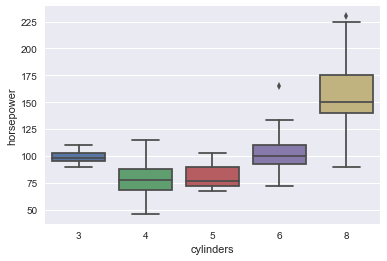

In [17]:
sn.boxplot( x = autos.cylinders, y = autos.horsepower )

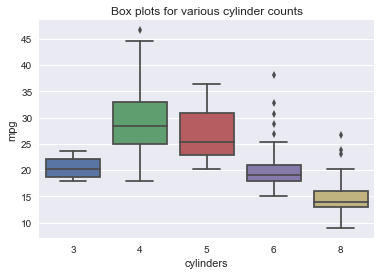

In [18]:
sn.boxplot( x = autos.cylinders, y = autos.mpg )
sn.plt.title( "Box plots for various cylinder counts")

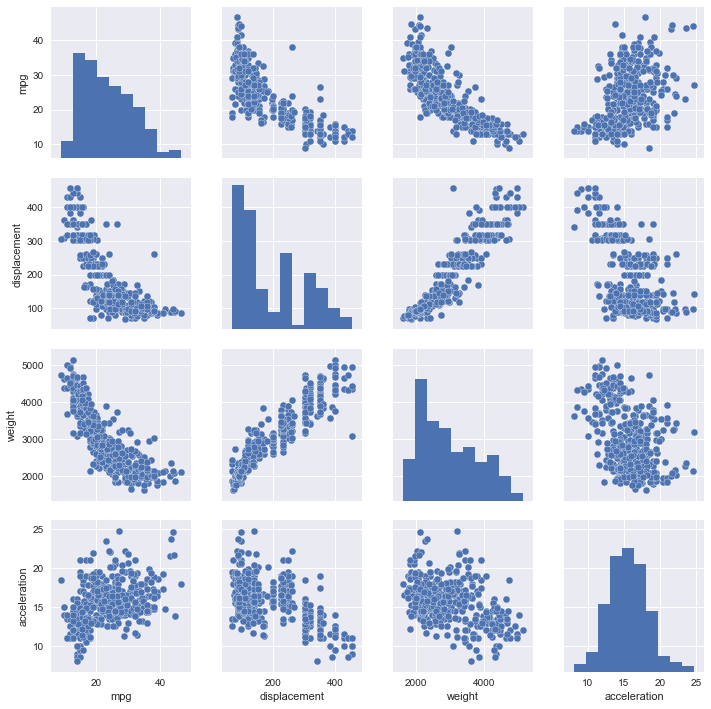

In [21]:
sn.pairplot(autos_stats)

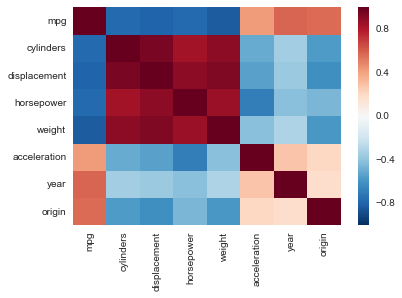

In [27]:
sn.set(rc={"figure.figsize": (6, 4)});
sn.heatmap(autos.corr())

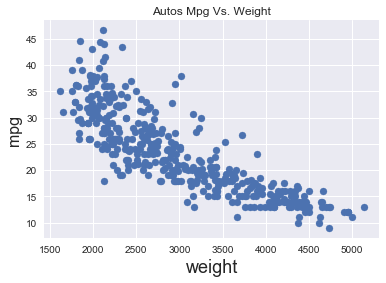

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
plt.scatter( autos.weight, autos.mpg )
plt.title("Autos Mpg Vs. Weight")
plt.xlabel('weight', fontsize=18)
plt.ylabel('mpg', fontsize=16)

fig.savefig('test.png')

In [32]:
autos['make'] = autos.name.map( lambda x: x.split( ' ')[0] )

In [33]:
mean_mpgs = autos.groupby( ["make"] )["mpg"].mean().reset_index()

In [35]:
mean_mpgs

,make,mpg
0,amc,18.070370
1,audi,26.714286
2,bmw,23.750000
3,buick,19.182353
4,cadillac,19.750000
5,capri,25.000000
6,chevroelt,16.000000
7,chevrolet,20.472093
8,chevy,18.000000
9,chrysler,17.266667


In [37]:
from scipy import stats
stats.ttest_ind( autos[ autos.make == "ford"]["mpg"],
              autos[ autos.make == "toyota" ]["mpg"],
              equal_var=True)

Ttest_indResult(statistic=-6.1491509381974332, pvalue=3.6159522633068309e-08)

In [38]:
import tweepy